In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb18c329a20>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb18c329438>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb18c329400>)


Epoch 1: 5.1s to complete
    error(train)=1.46e+00, acc(train)=5.99e-01, error(valid)=1.48e+00, acc(valid)=5.84e-01


Epoch 2: 4.8s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.56e-01


Epoch 3: 4.8s to complete
    error(train)=1.05e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.83e-01


Epoch 4: 4.8s to complete
    error(train)=9.66e-01, acc(train)=7.21e-01, error(valid)=1.00e+00, acc(valid)=7.08e-01


Epoch 5: 4.8s to complete
    error(train)=9.06e-01, acc(train)=7.35e-01, error(valid)=9.44e-01, acc(valid)=7.22e-01


Epoch 6: 4.8s to complete
    error(train)=8.42e-01, acc(train)=7.52e-01, error(valid)=8.88e-01, acc(valid)=7.36e-01


Epoch 7: 4.9s to complete
    error(train)=7.97e-01, acc(train)=7.64e-01, error(valid)=8.41e-01, acc(valid)=7.47e-01


Epoch 8: 4.9s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=8.16e-01, acc(valid)=7.54e-01


Epoch 9: 4.8s to complete
    error(train)=7.28e-01, acc(train)=7.82e-01, error(valid)=7.83e-01, acc(valid)=7.62e-01


Epoch 10: 4.8s to complete
    error(train)=6.97e-01, acc(train)=7.90e-01, error(valid)=7.55e-01, acc(valid)=7.66e-01


Epoch 11: 4.9s to complete
    error(train)=6.73e-01, acc(train)=7.95e-01, error(valid)=7.34e-01, acc(valid)=7.71e-01


Epoch 12: 4.8s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=7.15e-01, acc(valid)=7.77e-01


Epoch 13: 4.8s to complete
    error(train)=6.36e-01, acc(train)=8.05e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


Epoch 14: 5.6s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.86e-01, acc(valid)=7.85e-01


Epoch 15: 7.5s to complete
    error(train)=6.04e-01, acc(train)=8.14e-01, error(valid)=6.74e-01, acc(valid)=7.90e-01


Epoch 16: 8.9s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.64e-01, acc(valid)=7.91e-01


Epoch 17: 10.5s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.53e-01, acc(valid)=7.91e-01


Epoch 18: 12.4s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.44e-01, acc(valid)=7.95e-01


Epoch 19: 13.5s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.39e-01, acc(valid)=7.97e-01


Epoch 20: 14.1s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


Epoch 21: 14.2s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


Epoch 22: 13.5s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


Epoch 23: 13.5s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


Epoch 24: 13.6s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01


Epoch 25: 13.5s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=6.08e-01, acc(valid)=8.04e-01


Epoch 26: 13.6s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=6.06e-01, acc(valid)=8.06e-01


Epoch 27: 13.6s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=6.05e-01, acc(valid)=8.05e-01


Epoch 28: 13.7s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.93e-01, acc(valid)=8.10e-01


Epoch 29: 13.6s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.90e-01, acc(valid)=8.09e-01


Epoch 30: 13.7s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


Epoch 31: 13.6s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 32: 13.8s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 33: 13.9s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 34: 13.9s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.81e-01, acc(valid)=8.12e-01


Epoch 35: 13.9s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


Epoch 36: 14.1s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


Epoch 37: 14.1s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.71e-01, acc(valid)=8.14e-01


Epoch 38: 13.9s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 39: 13.6s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


Epoch 40: 13.8s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 41: 14.5s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


Epoch 42: 13.6s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


Epoch 43: 13.6s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.67e-01, acc(valid)=8.14e-01


Epoch 44: 13.6s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 45: 13.6s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 46: 13.6s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 47: 13.6s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 48: 13.8s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


Epoch 49: 14.0s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


Epoch 50: 14.0s to complete
    error(train)=4.01e-01, acc(train)=8.66e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 51: 13.9s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 52: 14.0s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 53: 14.0s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 54: 14.0s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 55: 14.0s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 56: 13.9s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 57: 14.0s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


Epoch 58: 14.0s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 59: 14.0s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 60: 14.1s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


Epoch 61: 15.5s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 62: 14.0s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 63: 14.0s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 64: 14.0s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 65: 14.0s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 66: 14.0s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 67: 14.0s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 68: 14.0s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 69: 13.9s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


Epoch 70: 13.9s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 71: 14.0s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 72: 14.0s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 73: 14.0s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


Epoch 74: 14.0s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 75: 14.0s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.48e-01, acc(valid)=8.27e-01


Epoch 76: 14.0s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 77: 14.0s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 78: 14.0s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


Epoch 79: 14.0s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 80: 14.4s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 81: 15.4s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 82: 14.1s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 83: 14.0s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 84: 14.0s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.54e-01, acc(valid)=8.28e-01


Epoch 85: 14.0s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 86: 14.0s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 87: 14.0s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


Epoch 88: 14.1s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


Epoch 89: 14.1s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 90: 14.3s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 91: 14.0s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


Epoch 92: 14.0s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 93: 14.1s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


Epoch 94: 14.1s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 95: 14.0s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 96: 13.9s to complete
    error(train)=3.14e-01, acc(train)=8.93e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 97: 14.0s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 98: 14.0s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 99: 14.0s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.63e-01, acc(valid)=8.24e-01


Epoch 100: 14.8s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


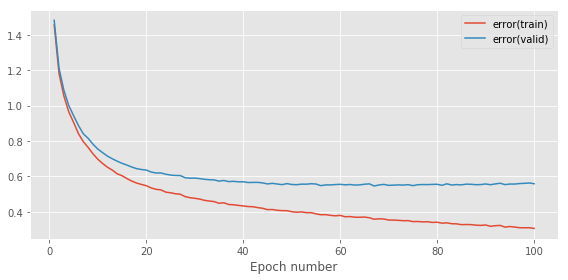

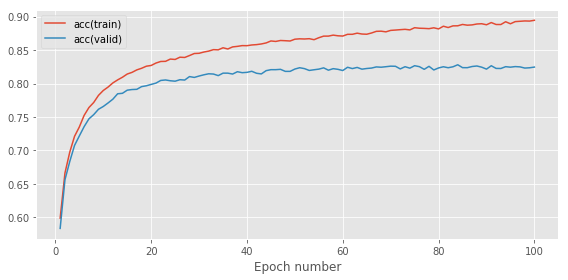

In [3]:
############## L2

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 1e-4
# learning_rates = [0.1,0.01,0.001,0.0001]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
coefficient = 1e-5
l2 = L2Penalty(coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = l2),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = l2)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_4_L2')

Epoch 1: 5.3s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.46e+00, acc(valid)=5.96e-01


Epoch 2: 4.8s to complete
    error(train)=1.20e+00, acc(train)=6.59e-01, error(valid)=1.20e+00, acc(valid)=6.56e-01


Epoch 3: 4.8s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 4: 4.9s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.84e-01, acc(valid)=7.13e-01


Epoch 5: 4.9s to complete
    error(train)=9.02e-01, acc(train)=7.35e-01, error(valid)=9.17e-01, acc(valid)=7.30e-01


Epoch 6: 4.9s to complete
    error(train)=8.49e-01, acc(train)=7.49e-01, error(valid)=8.68e-01, acc(valid)=7.43e-01


Epoch 7: 4.8s to complete
    error(train)=8.11e-01, acc(train)=7.59e-01, error(valid)=8.33e-01, acc(valid)=7.51e-01


Epoch 8: 4.9s to complete
    error(train)=7.71e-01, acc(train)=7.70e-01, error(valid)=7.96e-01, acc(valid)=7.58e-01


Epoch 9: 5.0s to complete
    error(train)=7.37e-01, acc(train)=7.78e-01, error(valid)=7.64e-01, acc(valid)=7.70e-01


Epoch 10: 4.9s to complete
    error(train)=7.13e-01, acc(train)=7.84e-01, error(valid)=7.41e-01, acc(valid)=7.75e-01


Epoch 11: 5.1s to complete
    error(train)=6.87e-01, acc(train)=7.91e-01, error(valid)=7.19e-01, acc(valid)=7.81e-01


Epoch 12: 5.0s to complete
    error(train)=6.67e-01, acc(train)=7.96e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


Epoch 13: 5.0s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.87e-01, acc(valid)=7.92e-01


Epoch 14: 5.1s to complete
    error(train)=6.33e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.95e-01


Epoch 15: 5.0s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01


Epoch 16: 5.0s to complete
    error(train)=6.03e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01


Epoch 17: 5.1s to complete
    error(train)=5.91e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.02e-01


Epoch 18: 5.0s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.30e-01, acc(valid)=8.07e-01


Epoch 19: 5.1s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


Epoch 20: 5.1s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


Epoch 21: 5.1s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


Epoch 22: 5.0s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 23: 5.0s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 24: 5.0s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 25: 5.0s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=5.83e-01, acc(valid)=8.17e-01


Epoch 26: 5.0s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


Epoch 27: 5.0s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


Epoch 28: 5.1s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 29: 5.1s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 30: 5.0s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 31: 5.0s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 32: 5.2s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 33: 5.4s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 34: 5.5s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 35: 5.3s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 36: 5.4s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 37: 5.5s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


Epoch 38: 5.4s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 39: 5.0s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 40: 5.0s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 41: 5.1s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 42: 5.0s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 43: 4.9s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 44: 5.0s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 45: 5.1s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 46: 5.6s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 47: 5.8s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 48: 5.0s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 49: 4.9s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 50: 5.0s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 51: 5.0s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 52: 5.0s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 53: 5.0s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 54: 5.0s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 55: 5.0s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 56: 5.0s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 57: 5.0s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 58: 5.0s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 59: 5.0s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 60: 5.0s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 61: 5.0s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 62: 5.0s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 63: 5.0s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 64: 4.9s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 65: 5.0s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 66: 4.9s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 67: 5.0s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 68: 5.0s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 69: 5.0s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 70: 5.0s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 71: 5.0s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 72: 5.0s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 73: 5.0s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 74: 5.0s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 75: 5.0s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 76: 4.9s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 77: 4.9s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 78: 5.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 79: 5.0s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 80: 4.9s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.35e-01


Epoch 81: 5.0s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 82: 5.0s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


Epoch 83: 5.0s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 84: 5.0s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 85: 5.0s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 86: 4.9s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 87: 4.9s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


Epoch 88: 5.0s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


Epoch 89: 5.0s to complete
    error(train)=3.28e-01, acc(train)=8.86e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 90: 5.0s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 91: 4.9s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 92: 5.0s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 93: 5.4s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.31e-01, acc(valid)=8.37e-01


Epoch 94: 5.5s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 95: 6.3s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


Epoch 96: 4.9s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


Epoch 97: 4.9s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.31e-01, acc(valid)=8.37e-01


Epoch 98: 4.9s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01


Epoch 99: 4.8s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.34e-01, acc(valid)=8.36e-01


Epoch 100: 4.9s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.34e-01, acc(valid)=8.36e-01


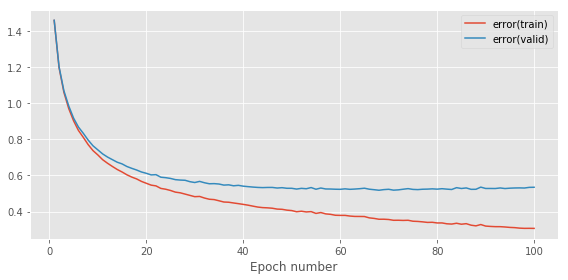

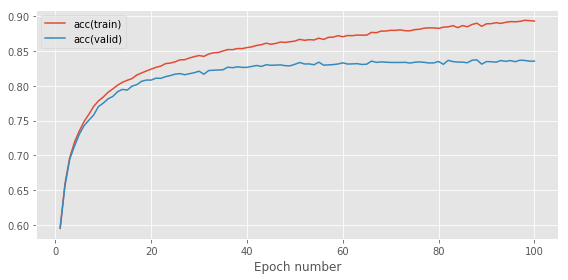

In [4]:
############## weight decay

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,fileName='cw4_4_weight_decay')

In [5]:
##### constant learning rate





In [6]:
###### cosine annealing schedule









learning_rate 0.0002
epoch 1


Epoch 1: 5.4s to complete
    error(train)=1.19e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


learning_rate 0.00019996299202742988
epoch 2


Epoch 2: 4.8s to complete
    error(train)=9.54e-01, acc(train)=7.23e-01, error(valid)=9.69e-01, acc(valid)=7.16e-01


learning_rate 0.00019985200463212038
epoch 3


Epoch 3: 5.3s to complete
    error(train)=8.30e-01, acc(train)=7.53e-01, error(valid)=8.50e-01, acc(valid)=7.44e-01


learning_rate 0.000199667147345231
epoch 4


Epoch 4: 6.0s to complete
    error(train)=7.43e-01, acc(train)=7.76e-01, error(valid)=7.69e-01, acc(valid)=7.70e-01


learning_rate 0.00019940860259858587
epoch 5


Epoch 5: 6.0s to complete
    error(train)=7.03e-01, acc(train)=7.83e-01, error(valid)=7.31e-01, acc(valid)=7.78e-01


learning_rate 0.00019907662554463534
epoch 6


Epoch 6: 5.0s to complete
    error(train)=6.54e-01, acc(train)=7.98e-01, error(valid)=6.85e-01, acc(valid)=7.90e-01


learning_rate 0.00019867154380465168
epoch 7


Epoch 7: 4.9s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=6.52e-01, acc(valid)=7.98e-01


learning_rate 0.00019819375714540607
epoch 8


Epoch 8: 4.9s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=8.01e-01


learning_rate 0.00019764373708464734
epoch 9


Epoch 9: 4.9s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


learning_rate 0.00019702202642577074
epoch 10


Epoch 10: 5.0s to complete
    error(train)=5.53e-01, acc(train)=8.22e-01, error(valid)=6.00e-01, acc(valid)=8.09e-01


learning_rate 0.00019632923872213654
epoch 11


Epoch 11: 5.0s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


learning_rate 0.00019556605767156692
epoch 12


Epoch 12: 5.0s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.72e-01, acc(valid)=8.19e-01


learning_rate 0.00019473323644161885
epoch 13


Epoch 13: 5.0s to complete
    error(train)=5.09e-01, acc(train)=8.35e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


learning_rate 0.0001938315969262986
epoch 14


Epoch 14: 5.0s to complete
    error(train)=4.96e-01, acc(train)=8.37e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


learning_rate 0.00019286202893495146
epoch 15


Epoch 15: 5.0s to complete
    error(train)=4.84e-01, acc(train)=8.41e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 0.0001918254893141276
epoch 16


Epoch 16: 5.1s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


learning_rate 0.00019072300100328977
epoch 17


Epoch 17: 5.0s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=5.45e-01, acc(valid)=8.21e-01


learning_rate 0.00018955565202529579
epoch 18


Epoch 18: 5.0s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


learning_rate 0.00018832459441265115
epoch 19


Epoch 19: 5.0s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


learning_rate 0.00018703104307059214
epoch 20


Epoch 20: 5.0s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


learning_rate 0.00018567627457812108
epoch 21


Epoch 21: 5.0s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 0.0001842616259281768
epoch 22


Epoch 22: 5.0s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


learning_rate 0.0001827884932081842
epoch 23


Epoch 23: 4.9s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.00018125833022228447
epoch 24


Epoch 24: 5.1s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 0.00017967264705660588
epoch 25


Epoch 25: 5.1s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.00017803300858899106
epoch 26


Epoch 26: 5.1s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


learning_rate 0.00017634103294465167
epoch 27


Epoch 27: 5.2s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.0001745983898992739
epoch 28


Epoch 28: 5.0s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


learning_rate 0.00017280679923115173
epoch 29


Epoch 29: 5.0s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


learning_rate 0.00017096802902397327
epoch 30


Epoch 30: 5.1s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.0001690838939219355
epoch 31


Epoch 31: 5.0s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


learning_rate 0.0001671562533389098
epoch 32


Epoch 32: 5.3s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.00016518700962342477
epoch 33


Epoch 33: 5.5s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.00016317810618127787
epoch 34


Epoch 34: 5.4s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.00016113152555762865
epoch 35


Epoch 35: 5.4s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


learning_rate 0.00015904928748046603
epoch 36


Epoch 36: 5.4s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.00015693344686738047
epoch 37


Epoch 37: 5.5s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.00015478609179760854
epoch 38


Epoch 38: 5.3s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


learning_rate 0.00015260934145135087
epoch 39


Epoch 39: 5.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


learning_rate 0.00015040534401839688
epoch 40


Epoch 40: 5.0s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


learning_rate 0.00014817627457812106
epoch 41


Epoch 41: 5.0s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


learning_rate 0.0001459243329529422
epoch 42


Epoch 42: 5.1s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.00014365174153736413
epoch 43


Epoch 43: 5.0s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


learning_rate 0.0001413607431047407
epoch 44


Epoch 44: 5.0s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


learning_rate 0.00013905359859392937
epoch 45


Epoch 45: 5.0s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


learning_rate 0.00013673258487801733
epoch 46


Epoch 46: 5.0s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


learning_rate 0.00013439999251732283
epoch 47


Epoch 47: 5.0s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.0001320581234988886
epoch 48


Epoch 48: 5.0s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


learning_rate 0.0001297092889646985
epoch 49


Epoch 49: 5.0s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


learning_rate 0.00012735580693085962
epoch 50


Epoch 50: 5.5s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


learning_rate 0.000125
epoch 51


Epoch 51: 5.6s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.0001226441930691404
epoch 52


Epoch 52: 5.3s to complete
    error(train)=3.06e-01, acc(train)=8.94e-01, error(valid)=4.99e-01, acc(valid)=8.42e-01


learning_rate 0.0001202907110353015
epoch 53


Epoch 53: 5.1s to complete
    error(train)=3.05e-01, acc(train)=8.94e-01, error(valid)=5.06e-01, acc(valid)=8.42e-01


learning_rate 0.00011794187650111142
epoch 54


Epoch 54: 5.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.00011560000748267717
epoch 55


Epoch 55: 5.1s to complete
    error(train)=3.01e-01, acc(train)=8.95e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


learning_rate 0.00011326741512198267
epoch 56


Epoch 56: 5.1s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


learning_rate 0.00011094640140607065
epoch 57


Epoch 57: 5.1s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


learning_rate 0.00010863925689525934
epoch 58


Epoch 58: 5.1s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


learning_rate 0.0001063482584626359
epoch 59


Epoch 59: 5.1s to complete
    error(train)=2.96e-01, acc(train)=8.97e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


learning_rate 0.00010407566704705783
epoch 60


Epoch 60: 5.1s to complete
    error(train)=2.94e-01, acc(train)=8.98e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


learning_rate 0.00010182372542187896
epoch 61


Epoch 61: 5.0s to complete
    error(train)=2.91e-01, acc(train)=8.99e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 9.959465598160315e-05
epoch 62


Epoch 62: 5.1s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


learning_rate 9.739065854864917e-05
epoch 63


Epoch 63: 5.0s to complete
    error(train)=2.87e-01, acc(train)=9.00e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


learning_rate 9.521390820239146e-05
epoch 64


Epoch 64: 5.0s to complete
    error(train)=2.84e-01, acc(train)=9.02e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


learning_rate 9.306655313261956e-05
epoch 65


Epoch 65: 5.0s to complete
    error(train)=2.84e-01, acc(train)=9.01e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


learning_rate 9.0950712519534e-05
epoch 66


Epoch 66: 5.0s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.12e-01, acc(valid)=8.41e-01


learning_rate 8.886847444237135e-05
epoch 67


Epoch 67: 5.0s to complete
    error(train)=2.80e-01, acc(train)=9.02e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


learning_rate 8.682189381872216e-05
epoch 68


Epoch 68: 5.0s to complete
    error(train)=2.77e-01, acc(train)=9.03e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


learning_rate 8.481299037657524e-05
epoch 69


Epoch 69: 5.1s to complete
    error(train)=2.76e-01, acc(train)=9.04e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


learning_rate 8.284374666109022e-05
epoch 70


Epoch 70: 5.1s to complete
    error(train)=2.75e-01, acc(train)=9.05e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


learning_rate 8.091610607806453e-05
epoch 71


Epoch 71: 5.0s to complete
    error(train)=2.76e-01, acc(train)=9.04e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


learning_rate 7.903197097602679e-05
epoch 72


Epoch 72: 5.1s to complete
    error(train)=2.72e-01, acc(train)=9.05e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


learning_rate 7.719320076884827e-05
epoch 73


Epoch 73: 5.1s to complete
    error(train)=2.71e-01, acc(train)=9.06e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


learning_rate 7.540161010072613e-05
epoch 74


Epoch 74: 5.1s to complete
    error(train)=2.68e-01, acc(train)=9.07e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


learning_rate 7.365896705534835e-05
epoch 75


Epoch 75: 5.1s to complete
    error(train)=2.71e-01, acc(train)=9.04e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


learning_rate 7.196699141100895e-05
epoch 76


Epoch 76: 5.0s to complete
    error(train)=2.66e-01, acc(train)=9.07e-01, error(valid)=5.18e-01, acc(valid)=8.39e-01


learning_rate 7.032735294339415e-05
epoch 77


Epoch 77: 5.1s to complete
    error(train)=2.66e-01, acc(train)=9.07e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


learning_rate 6.874166977771553e-05
epoch 78


Epoch 78: 5.0s to complete
    error(train)=2.65e-01, acc(train)=9.07e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


learning_rate 6.721150679181582e-05
epoch 79


Epoch 79: 5.1s to complete
    error(train)=2.63e-01, acc(train)=9.08e-01, error(valid)=5.21e-01, acc(valid)=8.38e-01


learning_rate 6.573837407182323e-05
epoch 80


Epoch 80: 5.1s to complete
    error(train)=2.63e-01, acc(train)=9.08e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


learning_rate 6.432372542187895e-05
epoch 81


Epoch 81: 5.1s to complete
    error(train)=2.62e-01, acc(train)=9.09e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


learning_rate 6.296895692940786e-05
epoch 82


Epoch 82: 5.0s to complete
    error(train)=2.62e-01, acc(train)=9.08e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


learning_rate 6.167540558734888e-05
epoch 83


Epoch 83: 5.0s to complete
    error(train)=2.60e-01, acc(train)=9.10e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


learning_rate 6.044434797470424e-05
epoch 84


Epoch 84: 5.0s to complete
    error(train)=2.60e-01, acc(train)=9.09e-01, error(valid)=5.26e-01, acc(valid)=8.38e-01


learning_rate 5.927699899671025e-05
epoch 85


Epoch 85: 5.0s to complete
    error(train)=2.60e-01, acc(train)=9.09e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


learning_rate 5.817451068587242e-05
epoch 86


Epoch 86: 5.0s to complete
    error(train)=2.58e-01, acc(train)=9.10e-01, error(valid)=5.28e-01, acc(valid)=8.37e-01


learning_rate 5.7137971065048554e-05
epoch 87


Epoch 87: 5.1s to complete
    error(train)=2.56e-01, acc(train)=9.11e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


learning_rate 5.616840307370142e-05
epoch 88


Epoch 88: 5.0s to complete
    error(train)=2.55e-01, acc(train)=9.10e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


learning_rate 5.526676355838115e-05
epoch 89


Epoch 89: 5.0s to complete
    error(train)=2.56e-01, acc(train)=9.10e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


learning_rate 5.44339423284331e-05
epoch 90


Epoch 90: 5.0s to complete
    error(train)=2.54e-01, acc(train)=9.11e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


learning_rate 5.367076127786349e-05
epoch 91


Epoch 91: 5.0s to complete
    error(train)=2.56e-01, acc(train)=9.10e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


learning_rate 5.2977973574229276e-05
epoch 92


Epoch 92: 5.1s to complete
    error(train)=2.53e-01, acc(train)=9.12e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


learning_rate 5.2356262915352675e-05
epoch 93


Epoch 93: 5.1s to complete
    error(train)=2.51e-01, acc(train)=9.12e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


learning_rate 5.180624285459394e-05
epoch 94


Epoch 94: 5.1s to complete
    error(train)=2.54e-01, acc(train)=9.12e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


learning_rate 5.132845619534836e-05
epoch 95


Epoch 95: 5.1s to complete
    error(train)=2.51e-01, acc(train)=9.12e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


learning_rate 5.092337445536468e-05
epoch 96


Epoch 96: 5.1s to complete
    error(train)=2.51e-01, acc(train)=9.12e-01, error(valid)=5.35e-01, acc(valid)=8.36e-01


learning_rate 5.059139740141417e-05
epoch 97


Epoch 97: 5.6s to complete
    error(train)=2.49e-01, acc(train)=9.13e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


learning_rate 5.0332852654769e-05
epoch 98


Epoch 98: 6.1s to complete
    error(train)=2.49e-01, acc(train)=9.13e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


learning_rate 5.014799536787964e-05
epoch 99


Epoch 99: 5.6s to complete
    error(train)=2.49e-01, acc(train)=9.13e-01, error(valid)=5.37e-01, acc(valid)=8.37e-01


learning_rate 5.003700797257013e-05
epoch 100


Epoch 100: 5.0s to complete
    error(train)=2.48e-01, acc(train)=9.13e-01, error(valid)=5.36e-01, acc(valid)=8.36e-01


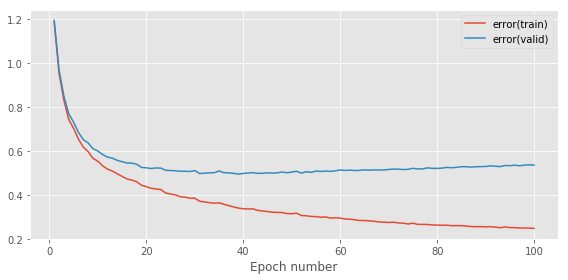

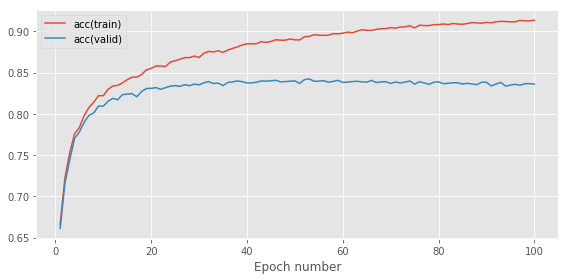

In [18]:
###### no restarts in the scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 1e-4
learning_range = 2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart,fileName='cw4_4_no_restart')



In [16]:
##### use of a warm restart


from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule,AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts,ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 1e-4
learning_range = 3
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_warm = CosineAnnealingWithWarmRestarts(min_learning_rate = learning_rate, max_learning_rate = learning_rate * 10,
                                                       total_iters_per_period=5,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=2)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_warm,fileName='cw4_4_warm_restart')




learning_rate 0.001
epoch 1


Epoch 1: 4.8s to complete
    error(train)=7.45e-01, acc(train)=7.67e-01, error(valid)=7.68e-01, acc(valid)=7.59e-01


learning_rate 0.0009140576474687263
epoch 2


Epoch 2: 4.7s to complete
    error(train)=6.19e-01, acc(train)=8.00e-01, error(valid)=6.65e-01, acc(valid)=7.90e-01


learning_rate 0.0006890576474687264
epoch 3


Epoch 3: 4.7s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=5.83e-01, acc(valid)=8.13e-01


learning_rate 0.0004109423525312737
epoch 4


Epoch 4: 4.7s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


learning_rate 0.00018594235253127368
epoch 5


Epoch 5: 4.8s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 0.0009000000000000001
epoch 6


Epoch 6: 4.9s to complete
    error(train)=4.79e-01, acc(train)=8.39e-01, error(valid)=5.60e-01, acc(valid)=8.17e-01


learning_rate 0.0008804226065180615
epoch 7


Epoch 7: 4.8s to complete
    error(train)=4.39e-01, acc(train)=8.49e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


learning_rate 0.0008236067977499791
epoch 8


Epoch 8: 4.9s to complete
    error(train)=4.17e-01, acc(train)=8.53e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


learning_rate 0.0007351141009169893
epoch 9


Epoch 9: 4.9s to complete
    error(train)=3.88e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


learning_rate 0.0006236067977499791
epoch 10


Epoch 10: 4.8s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


learning_rate 0.0005
epoch 11


Epoch 11: 5.0s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01


learning_rate 0.0003763932022500211
epoch 12


Epoch 12: 4.9s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


learning_rate 0.0002648858990830108
epoch 13


Epoch 13: 4.9s to complete
    error(train)=3.12e-01, acc(train)=8.89e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


learning_rate 0.00017639320225002107
epoch 14


Epoch 14: 4.9s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


learning_rate 0.0001195773934819386
epoch 15


Epoch 15: 5.0s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=4.72e-01, acc(valid)=8.47e-01


learning_rate 0.0008100000000000001
epoch 16


Epoch 16: 5.0s to complete
    error(train)=3.41e-01, acc(train)=8.78e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 0.0008056293609112739
epoch 17


Epoch 17: 5.0s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


learning_rate 0.0007926250632847796
epoch 18


Epoch 18: 4.9s to complete
    error(train)=3.30e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


learning_rate 0.0007713073160868706
epoch 19


Epoch 19: 5.0s to complete
    error(train)=3.15e-01, acc(train)=8.84e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


learning_rate 0.0007422010330031064
epoch 20


Epoch 20: 5.2s to complete
    error(train)=3.03e-01, acc(train)=8.88e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


learning_rate 0.0007060229073212244
epoch 21


Epoch 21: 5.1s to complete
    error(train)=2.89e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


learning_rate 0.000663663764563828
epoch 22


Epoch 22: 5.0s to complete
    error(train)=2.77e-01, acc(train)=8.95e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 0.0006161666274075391
epoch 23


Epoch 23: 5.0s to complete
    error(train)=2.80e-01, acc(train)=8.95e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


learning_rate 0.0005647010330031064
epoch 24


Epoch 24: 5.1s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


learning_rate 0.000510534235089282
epoch 25


Epoch 25: 5.0s to complete
    error(train)=2.48e-01, acc(train)=9.07e-01, error(valid)=5.32e-01, acc(valid)=8.38e-01


learning_rate 0.000455
epoch 26


Epoch 26: 5.0s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=5.38e-01, acc(valid)=8.36e-01


learning_rate 0.000399465764910718
epoch 27


Epoch 27: 5.0s to complete
    error(train)=2.26e-01, acc(train)=9.15e-01, error(valid)=5.33e-01, acc(valid)=8.40e-01


learning_rate 0.0003452989669968937
epoch 28


Epoch 28: 5.0s to complete
    error(train)=2.20e-01, acc(train)=9.16e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


learning_rate 0.0002938333725924609
epoch 29


Epoch 29: 5.0s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=5.37e-01, acc(valid)=8.42e-01


learning_rate 0.00024633623543617207
epoch 30


Epoch 30: 5.0s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=5.45e-01, acc(valid)=8.39e-01


learning_rate 0.00020397709267877567
epoch 31


Epoch 31: 5.0s to complete
    error(train)=2.01e-01, acc(train)=9.24e-01, error(valid)=5.51e-01, acc(valid)=8.38e-01


learning_rate 0.0001677989669968937
epoch 32


Epoch 32: 5.2s to complete
    error(train)=1.97e-01, acc(train)=9.28e-01, error(valid)=5.51e-01, acc(valid)=8.39e-01


learning_rate 0.00013869268391312944
epoch 33


Epoch 33: 5.4s to complete
    error(train)=1.90e-01, acc(train)=9.30e-01, error(valid)=5.48e-01, acc(valid)=8.42e-01


learning_rate 0.0001173749367152205
epoch 34


Epoch 34: 5.3s to complete
    error(train)=1.86e-01, acc(train)=9.31e-01, error(valid)=5.49e-01, acc(valid)=8.43e-01


learning_rate 0.00010437063908872613
epoch 35


Epoch 35: 5.4s to complete
    error(train)=1.87e-01, acc(train)=9.31e-01, error(valid)=5.56e-01, acc(valid)=8.39e-01


learning_rate 0.0007290000000000002
epoch 36


Epoch 36: 5.3s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=6.07e-01, acc(valid)=8.24e-01


learning_rate 0.0007280305014590689
epoch 37


Epoch 37: 5.4s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01


learning_rate 0.000725127983117171
epoch 38


Epoch 38: 5.4s to complete
    error(train)=2.50e-01, acc(train)=9.02e-01, error(valid)=6.16e-01, acc(valid)=8.26e-01


learning_rate 0.0007203103399650694
epoch 39


Epoch 39: 5.0s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=6.14e-01, acc(valid)=8.30e-01


learning_rate 0.000713607274374826
epoch 40


Epoch 40: 5.5s to complete
    error(train)=2.37e-01, acc(train)=9.05e-01, error(valid)=6.33e-01, acc(valid)=8.25e-01


learning_rate 0.0007050601129747998
epoch 41


Epoch 41: 5.5s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=6.18e-01, acc(valid)=8.27e-01


learning_rate 0.0006947215518572418
epoch 42


Epoch 42: 5.2s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.28e-01, acc(valid)=8.29e-01


learning_rate 0.0006826553316893622
epoch 43


Epoch 43: 4.9s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=6.39e-01, acc(valid)=8.25e-01


learning_rate 0.0006689358447309211
epoch 44


Epoch 44: 4.9s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=6.38e-01, acc(valid)=8.29e-01


learning_rate 0.0006536476761812099
epoch 45


Epoch 45: 4.9s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.59e-01, acc(valid)=8.28e-01


learning_rate 0.0006368850826831694
epoch 46


Epoch 46: 4.9s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=6.69e-01, acc(valid)=8.27e-01


learning_rate 0.0006187514111998428
epoch 47


Epoch 47: 4.9s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.76e-01, acc(valid)=8.29e-01


learning_rate 0.0005993584618459829
epoch 48


Epoch 48: 4.9s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=6.77e-01, acc(valid)=8.28e-01


learning_rate 0.000578825798603166
epoch 49


Epoch 49: 4.9s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=6.88e-01, acc(valid)=8.30e-01


learning_rate 0.0005572800121680876
epoch 50


Epoch 50: 4.9s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.00e-01, acc(valid)=8.26e-01


learning_rate 0.0005348539394788209
epoch 51


Epoch 51: 4.9s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=7.06e-01, acc(valid)=8.30e-01


learning_rate 0.0005116858447309211
epoch 52


Epoch 52: 5.0s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=7.09e-01, acc(valid)=8.30e-01


learning_rate 0.00048791856693268233
epoch 53


Epoch 53: 5.0s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=7.22e-01, acc(valid)=8.26e-01


learning_rate 0.0004636986392551527
epoch 54


Epoch 54: 5.0s to complete
    error(train)=1.57e-01, acc(train)=9.38e-01, error(valid)=7.32e-01, acc(valid)=8.26e-01


learning_rate 0.0004391753856064073
epoch 55


Epoch 55: 5.0s to complete
    error(train)=1.54e-01, acc(train)=9.38e-01, error(valid)=7.47e-01, acc(valid)=8.25e-01


learning_rate 0.00041450000000000005
epoch 56


Epoch 56: 4.9s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=7.62e-01, acc(valid)=8.25e-01


learning_rate 0.00038982461439359285
epoch 57


Epoch 57: 4.9s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=7.62e-01, acc(valid)=8.26e-01


learning_rate 0.00036530136074484736
epoch 58


Epoch 58: 4.9s to complete
    error(train)=1.39e-01, acc(train)=9.45e-01, error(valid)=7.62e-01, acc(valid)=8.25e-01


learning_rate 0.0003410814330673179
epoch 59


Epoch 59: 4.9s to complete
    error(train)=1.34e-01, acc(train)=9.47e-01, error(valid)=7.79e-01, acc(valid)=8.26e-01


learning_rate 0.0003173141552690791
epoch 60


Epoch 60: 4.9s to complete
    error(train)=1.30e-01, acc(train)=9.49e-01, error(valid)=7.84e-01, acc(valid)=8.29e-01


learning_rate 0.00029414606052117933
epoch 61


Epoch 61: 4.9s to complete
    error(train)=1.30e-01, acc(train)=9.49e-01, error(valid)=7.97e-01, acc(valid)=8.26e-01


learning_rate 0.0002717199878319126
epoch 62


Epoch 62: 4.9s to complete
    error(train)=1.23e-01, acc(train)=9.53e-01, error(valid)=8.12e-01, acc(valid)=8.28e-01


learning_rate 0.00025017420139683414
epoch 63


Epoch 63: 5.0s to complete
    error(train)=1.20e-01, acc(train)=9.53e-01, error(valid)=8.18e-01, acc(valid)=8.26e-01


learning_rate 0.00022964153815401727
epoch 64


Epoch 64: 4.9s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=8.27e-01, acc(valid)=8.25e-01


learning_rate 0.0002102485888001573
epoch 65


Epoch 65: 5.0s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=8.47e-01, acc(valid)=8.24e-01


learning_rate 0.00019211491731683085
epoch 66


Epoch 66: 4.9s to complete
    error(train)=1.10e-01, acc(train)=9.58e-01, error(valid)=8.40e-01, acc(valid)=8.27e-01


learning_rate 0.0001753523238187903
epoch 67


Epoch 67: 4.9s to complete
    error(train)=1.10e-01, acc(train)=9.59e-01, error(valid)=8.47e-01, acc(valid)=8.25e-01


learning_rate 0.00016006415526907908
epoch 68


Epoch 68: 4.9s to complete
    error(train)=1.09e-01, acc(train)=9.59e-01, error(valid)=8.62e-01, acc(valid)=8.25e-01


learning_rate 0.00014634466831063802
epoch 69


Epoch 69: 5.0s to complete
    error(train)=1.03e-01, acc(train)=9.61e-01, error(valid)=8.61e-01, acc(valid)=8.28e-01


learning_rate 0.00013427844814275835
epoch 70


Epoch 70: 5.0s to complete
    error(train)=1.03e-01, acc(train)=9.62e-01, error(valid)=8.78e-01, acc(valid)=8.28e-01


learning_rate 0.00012393988702520033
epoch 71


Epoch 71: 4.9s to complete
    error(train)=1.01e-01, acc(train)=9.63e-01, error(valid)=8.82e-01, acc(valid)=8.26e-01


learning_rate 0.00011539272562517423
epoch 72


Epoch 72: 4.9s to complete
    error(train)=9.99e-02, acc(train)=9.63e-01, error(valid)=8.88e-01, acc(valid)=8.25e-01


learning_rate 0.00010868966003493073
epoch 73


Epoch 73: 5.0s to complete
    error(train)=9.86e-02, acc(train)=9.64e-01, error(valid)=8.95e-01, acc(valid)=8.26e-01


learning_rate 0.00010387201688282921
epoch 74


Epoch 74: 5.1s to complete
    error(train)=9.63e-02, acc(train)=9.65e-01, error(valid)=8.99e-01, acc(valid)=8.25e-01


learning_rate 0.00010096949854093126
epoch 75


Epoch 75: 5.1s to complete
    error(train)=9.55e-02, acc(train)=9.65e-01, error(valid)=9.06e-01, acc(valid)=8.24e-01


learning_rate 0.0006561000000000001
epoch 76


Epoch 76: 5.0s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=9.15e-01, acc(valid)=8.17e-01


learning_rate 0.0006558856335267331
epoch 77


Epoch 77: 5.0s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=9.08e-01, acc(valid)=8.18e-01


learning_rate 0.0006552428646444963
epoch 78


Epoch 78: 5.1s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=9.31e-01, acc(valid)=8.20e-01


learning_rate 0.0006541726844563173
epoch 79


Epoch 79: 5.2s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=9.03e-01, acc(valid)=8.18e-01


learning_rate 0.0006526767431024781
epoch 80


Epoch 80: 5.1s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=9.65e-01, acc(valid)=8.13e-01


learning_rate 0.0006507573472161182
epoch 81


Epoch 81: 5.1s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=9.45e-01, acc(valid)=8.16e-01


learning_rate 0.0006484174563665741
epoch 82


Epoch 82: 5.1s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=9.83e-01, acc(valid)=8.13e-01


learning_rate 0.0006456606784959367
epoch 83


Epoch 83: 5.1s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=9.84e-01, acc(valid)=8.20e-01


learning_rate 0.0006424912643558675
epoch 84


Epoch 84: 5.0s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=9.57e-01, acc(valid)=8.12e-01


learning_rate 0.0006389141009532468
epoch 85


Epoch 85: 5.1s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=9.55e-01, acc(valid)=8.19e-01


learning_rate 0.0006349347040147633
epoch 86


Epoch 86: 5.1s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.85e-01, acc(valid)=8.19e-01


learning_rate 0.0006305592094820639
epoch 87


Epoch 87: 5.5s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=9.89e-01, acc(valid)=8.14e-01


learning_rate 0.0006257943640505758
epoch 88


Epoch 88: 5.8s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.00e+00, acc(valid)=8.16e-01


learning_rate 0.0006206475147665913
epoch 89


Epoch 89: 6.3s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=1.02e+00, acc(valid)=8.12e-01


learning_rate 0.0006151265976986553
epoch 90


Epoch 90: 5.2s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.01e+00, acc(valid)=8.18e-01


learning_rate 0.0006092401257007228
epoch 91


Epoch 91: 5.3s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


learning_rate 0.0006029971752859542
epoch 92


Epoch 92: 5.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.05e+00, acc(valid)=8.19e-01


learning_rate 0.0005964073726313912
epoch 93


KeyboardInterrupt: 